# Data Exploration Template

## Heart Disease Classification Analysis

## 1. Import Libraries

In [1]:
# Installing missing libraries
%pip install seaborn xgboost lightgbm -q

Note: you may need to restart the kernel to use updated packages.


In [56]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline

# Settings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.float_format', '{:.2f}'.format)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Data Ingestion

In [3]:
# Load datasets
train_df = pd.read_csv('data/train.csv', index_col=0)
test_df = pd.read_csv('data/test.csv', index_col=0)

print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

Train dataset shape: (630000, 14)
Test dataset shape: (270000, 13)


## 3. Exploratory Data Analysis (EDA)

### 3.1 Initial Data Overview

In [4]:
# Display first few rows of the training data
print("First 5 rows of training data:")
display(train_df.head())

First 5 rows of training data:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
id,,,,,,,,,,,,,,
0,58,1,4,152,239,0,0,158,1,3.60,2,2,7,Presence
1,52,1,1,125,325,0,2,171,0,0.00,1,0,3,Absence
2,56,0,2,160,188,0,2,151,0,0.00,1,0,3,Absence
3,44,0,3,134,229,0,2,150,0,1.00,2,0,3,Absence
4,58,1,4,140,234,0,2,125,1,3.80,2,3,3,Presence


In [5]:
# Dataset information
print("Dataset Information:")
train_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 630000 entries, 0 to 629999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      630000 non-null  int64  
 1   Sex                      630000 non-null  int64  
 2   Chest pain type          630000 non-null  int64  
 3   BP                       630000 non-null  int64  
 4   Cholesterol              630000 non-null  int64  
 5   FBS over 120             630000 non-null  int64  
 6   EKG results              630000 non-null  int64  
 7   Max HR                   630000 non-null  int64  
 8   Exercise angina          630000 non-null  int64  
 9   ST depression            630000 non-null  float64
 10  Slope of ST              630000 non-null  int64  
 11  Number of vessels fluro  630000 non-null  int64  
 12  Thallium                 630000 non-null  int64  
 13  Heart Disease            630000 non-null  o

All variables are numerical, except the target. No missing values found.

In [6]:
# Statistical summary of the train set
print("Statistical Summary:")
display(train_df.describe())

Statistical Summary:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00,630000.00
mean,54.14,0.71,3.31,130.50,245.01,0.08,0.98,152.82,0.27,0.72,1.46,0.45,4.62
std,8.26,0.45,0.85,14.98,33.68,0.27,1.00,19.11,0.45,0.95,0.55,0.80,1.95
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00
25%,48.00,0.00,3.00,120.00,223.00,0.00,0.00,142.00,0.00,0.00,1.00,0.00,3.00
50%,54.00,1.00,4.00,130.00,243.00,0.00,0.00,157.00,0.00,0.10,1.00,0.00,3.00
75%,60.00,1.00,4.00,140.00,269.00,0.00,2.00,166.00,1.00,1.40,2.00,1.00,7.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00


In [7]:
# Display first few rows of the test data
print("First 5 rows of test data:")
display(test_df.head())

First 5 rows of test data:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
id,,,,,,,,,,,,,
630000,58,1,3,120,288,0,2,145,1,0.80,2,3,3
630001,55,0,2,120,209,0,0,172,0,0.00,1,0,3
630002,54,1,4,120,268,0,0,150,1,0.00,2,3,7
630003,44,0,3,112,177,0,0,168,0,0.90,1,0,3
630004,43,1,1,138,267,0,0,163,0,1.80,2,0,7


In [8]:
# Test set information
print("Test Set Information:")
test_df.info()

Test Set Information:
<class 'pandas.core.frame.DataFrame'>
Index: 270000 entries, 630000 to 899999
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Age                      270000 non-null  int64  
 1   Sex                      270000 non-null  int64  
 2   Chest pain type          270000 non-null  int64  
 3   BP                       270000 non-null  int64  
 4   Cholesterol              270000 non-null  int64  
 5   FBS over 120             270000 non-null  int64  
 6   EKG results              270000 non-null  int64  
 7   Max HR                   270000 non-null  int64  
 8   Exercise angina          270000 non-null  int64  
 9   ST depression            270000 non-null  float64
 10  Slope of ST              270000 non-null  int64  
 11  Number of vessels fluro  270000 non-null  int64  
 12  Thallium                 270000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage

No missing values found.

In [9]:
# Statistical summary of the test set
print("Statistical Summary:")
display(test_df.describe())

Statistical Summary:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270000.00,270000.00,270000.00,270000.00,270000.00,270000.00,270000.00,270000.00,270000.00,270000.00,270000.00,270000.00,270000.00
mean,54.16,0.72,3.32,130.56,245.05,0.08,0.98,152.78,0.27,0.72,1.46,0.45,4.62
std,8.26,0.45,0.85,15.01,33.70,0.27,1.00,19.15,0.45,0.95,0.55,0.80,1.95
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00,3.00
25%,48.00,0.00,3.00,120.00,223.00,0.00,0.00,142.00,0.00,0.00,1.00,0.00,3.00
50%,54.00,1.00,4.00,130.00,243.00,0.00,0.00,157.00,0.00,0.10,1.00,0.00,3.00
75%,60.00,1.00,4.00,140.00,269.00,0.00,2.00,166.00,1.00,1.40,2.00,1.00,7.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,3.00,7.00


### 3.3 Duplicate Values

In [10]:
# Check for duplicates on the train set
duplicates = train_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates/len(train_df)*100):.2f}%")

Number of duplicate rows: 0
Percentage of duplicates: 0.00%


In [11]:
# Check for duplicates on the test set
duplicates = test_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Percentage of duplicates: {(duplicates/len(test_df)*100):.2f}%")

Number of duplicate rows: 0
Percentage of duplicates: 0.00%


No duplicates in both the training and test set

### 3.4 Data Types and Unique Values

In [12]:
# Analyze data types and unique values
dtype_df = pd.DataFrame({
    'Column': train_df.columns,
    'Data_Type': train_df.dtypes.values,
    'Unique_Values': [train_df[col].nunique() for col in train_df.columns],
    'Sample_Values': [train_df[col].unique()[:5] for col in train_df.columns]
})
display(dtype_df)

,Column,Data_Type,Unique_Values,Sample_Values
0,Age,int64,42,"[58, 52, 56, 44, 38]"
1,Sex,int64,2,"[1, 0]"
2,Chest pain type,int64,4,"[4, 1, 2, 3]"
3,BP,int64,66,"[152, 125, 160, 134, 140]"
4,Cholesterol,int64,150,"[239, 325, 188, 229, 234]"
5,FBS over 120,int64,2,"[0, 1]"
6,EKG results,int64,3,"[0, 2, 1]"
7,Max HR,int64,93,"[158, 171, 151, 150, 125]"
8,Exercise angina,int64,2,"[1, 0]"
9,ST depression,float64,66,"[3.6, 0.0, 1.0, 3.8, 1.6]"


categoricals = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']

### 3.5 Target Variable Distribution

In [13]:
# Identify target column (modify if needed)
# Assuming the last column is the target or adjust as needed
target_col = train_df.columns[-1]

print(f"Target variable: {target_col}")
print(f"\nTarget distribution:")
print(train_df[target_col].value_counts())
print(f"\nTarget proportions:")
print(train_df[target_col].value_counts(normalize=True))

Target variable: Heart Disease

Target distribution:
Heart Disease
Absence     347546
Presence    282454
Name: count, dtype: int64

Target proportions:
Heart Disease
Absence    0.55
Presence   0.45
Name: proportion, dtype: float64


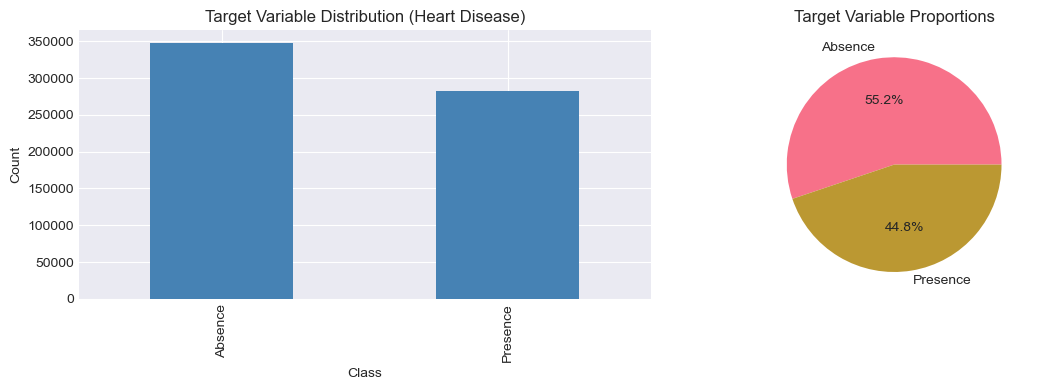

In [14]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
train_df[target_col].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title(f'Target Variable Distribution ({target_col})')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')

# Pie chart
train_df[target_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title(f'Target Variable Proportions')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

Target variable is more or less balanced.

### 3.6 Numerical Features Analysis

In [15]:
# Identify numerical columns
exclude_categoricals = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
numerical_cols = [col for col in train_df.select_dtypes(include=[np.number]).columns.tolist() if col not in exclude_categoricals]
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")

Numerical columns (5): ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']


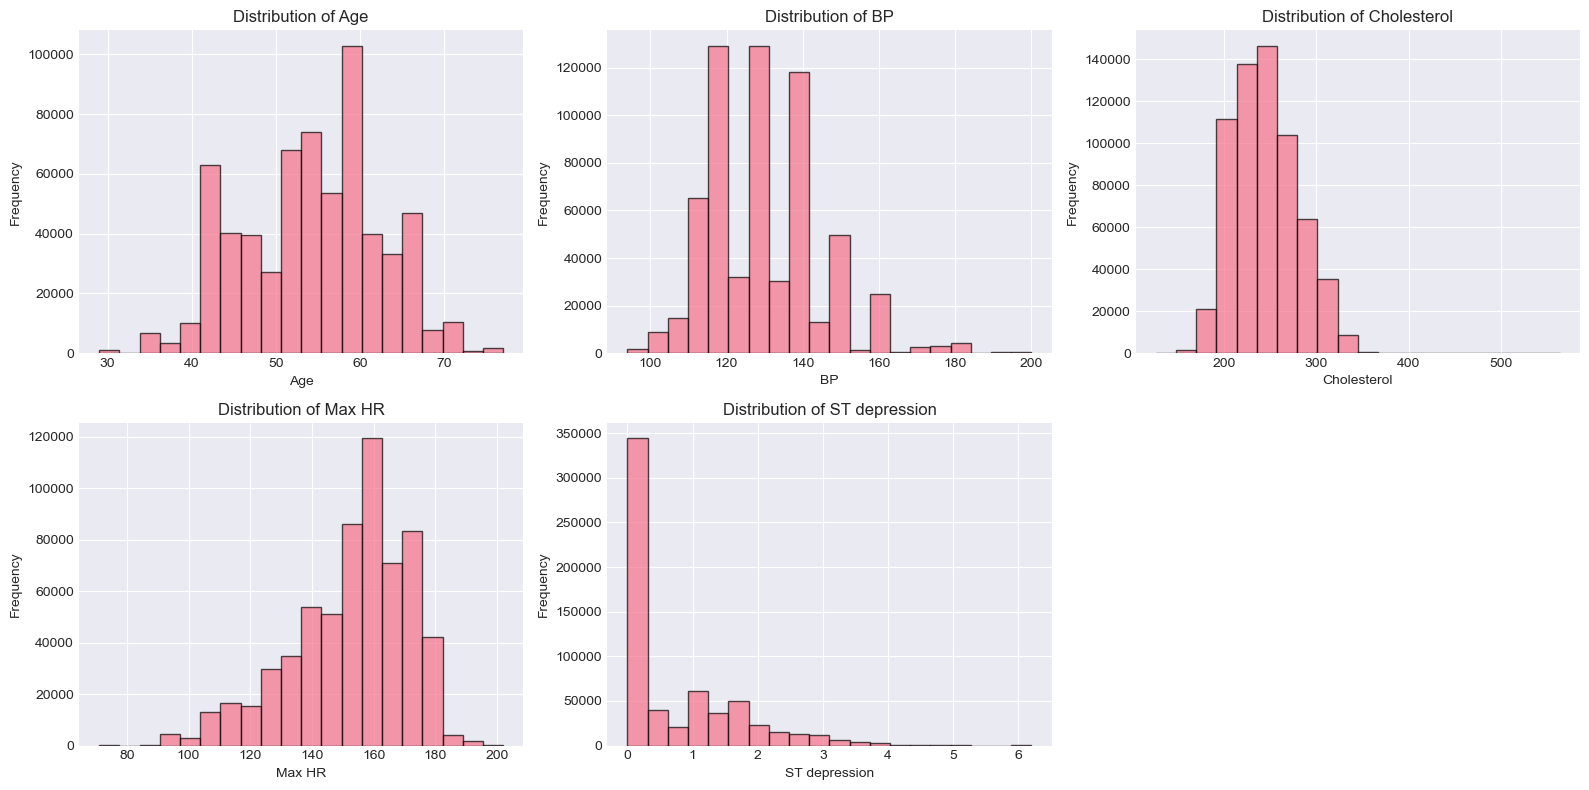

In [16]:
# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].hist(train_df[col].dropna(), bins=20, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
    
    # Hide extra subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

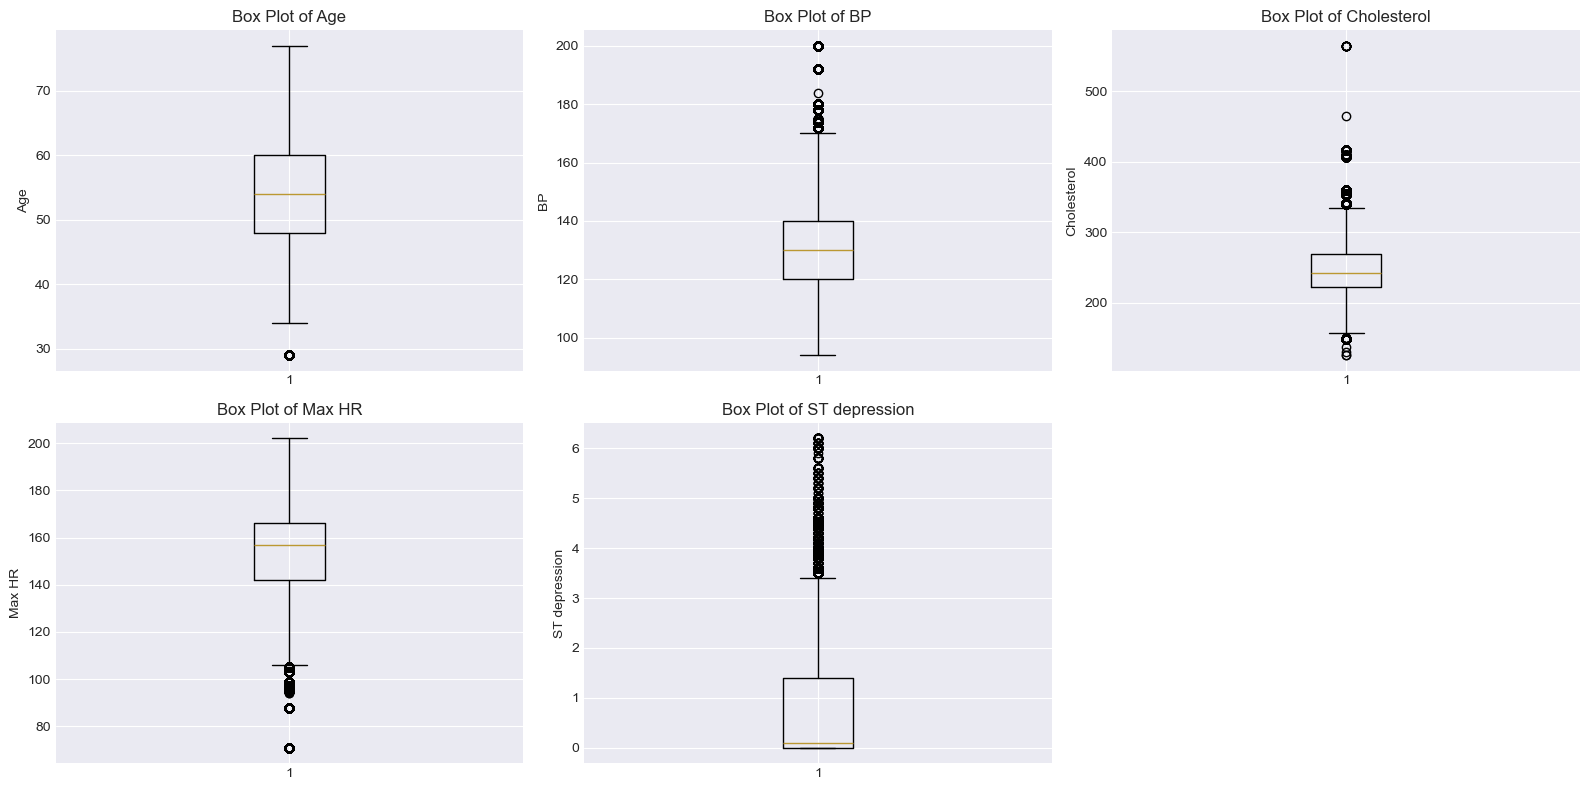

In [17]:
# Box plots for numerical features
if len(numerical_cols) > 0:
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]
    
    for idx, col in enumerate(numerical_cols):
        axes[idx].boxplot(train_df[col].dropna())
        axes[idx].set_title(f'Box Plot of {col}')
        axes[idx].set_ylabel(col)
    
    # Hide extra subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

### 3.7 Categorical Features Analysis

In [18]:
# Identify categorical columns
categorical_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

Categorical columns (8): ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


In [19]:
# Distribution of categorical features
if len(categorical_cols) > 0:
    for col in categorical_cols:
        print(f"\nProportions:")
        print(train_df[col].value_counts(normalize=True))


Proportions:
Sex
1   0.71
0   0.29
Name: proportion, dtype: float64

Proportions:
Chest pain type
4   0.52
3   0.31
2   0.12
1   0.05
Name: proportion, dtype: float64

Proportions:
FBS over 120
0   0.92
1   0.08
Name: proportion, dtype: float64

Proportions:
EKG results
0   0.51
2   0.49
1   0.00
Name: proportion, dtype: float64

Proportions:
Exercise angina
0   0.73
1   0.27
Name: proportion, dtype: float64

Proportions:
Slope of ST
1   0.57
2   0.41
3   0.02
Name: proportion, dtype: float64

Proportions:
Number of vessels fluro
0   0.71
1   0.17
2   0.09
3   0.04
Name: proportion, dtype: float64

Proportions:
Thallium
3   0.59
7   0.39
6   0.02
Name: proportion, dtype: float64


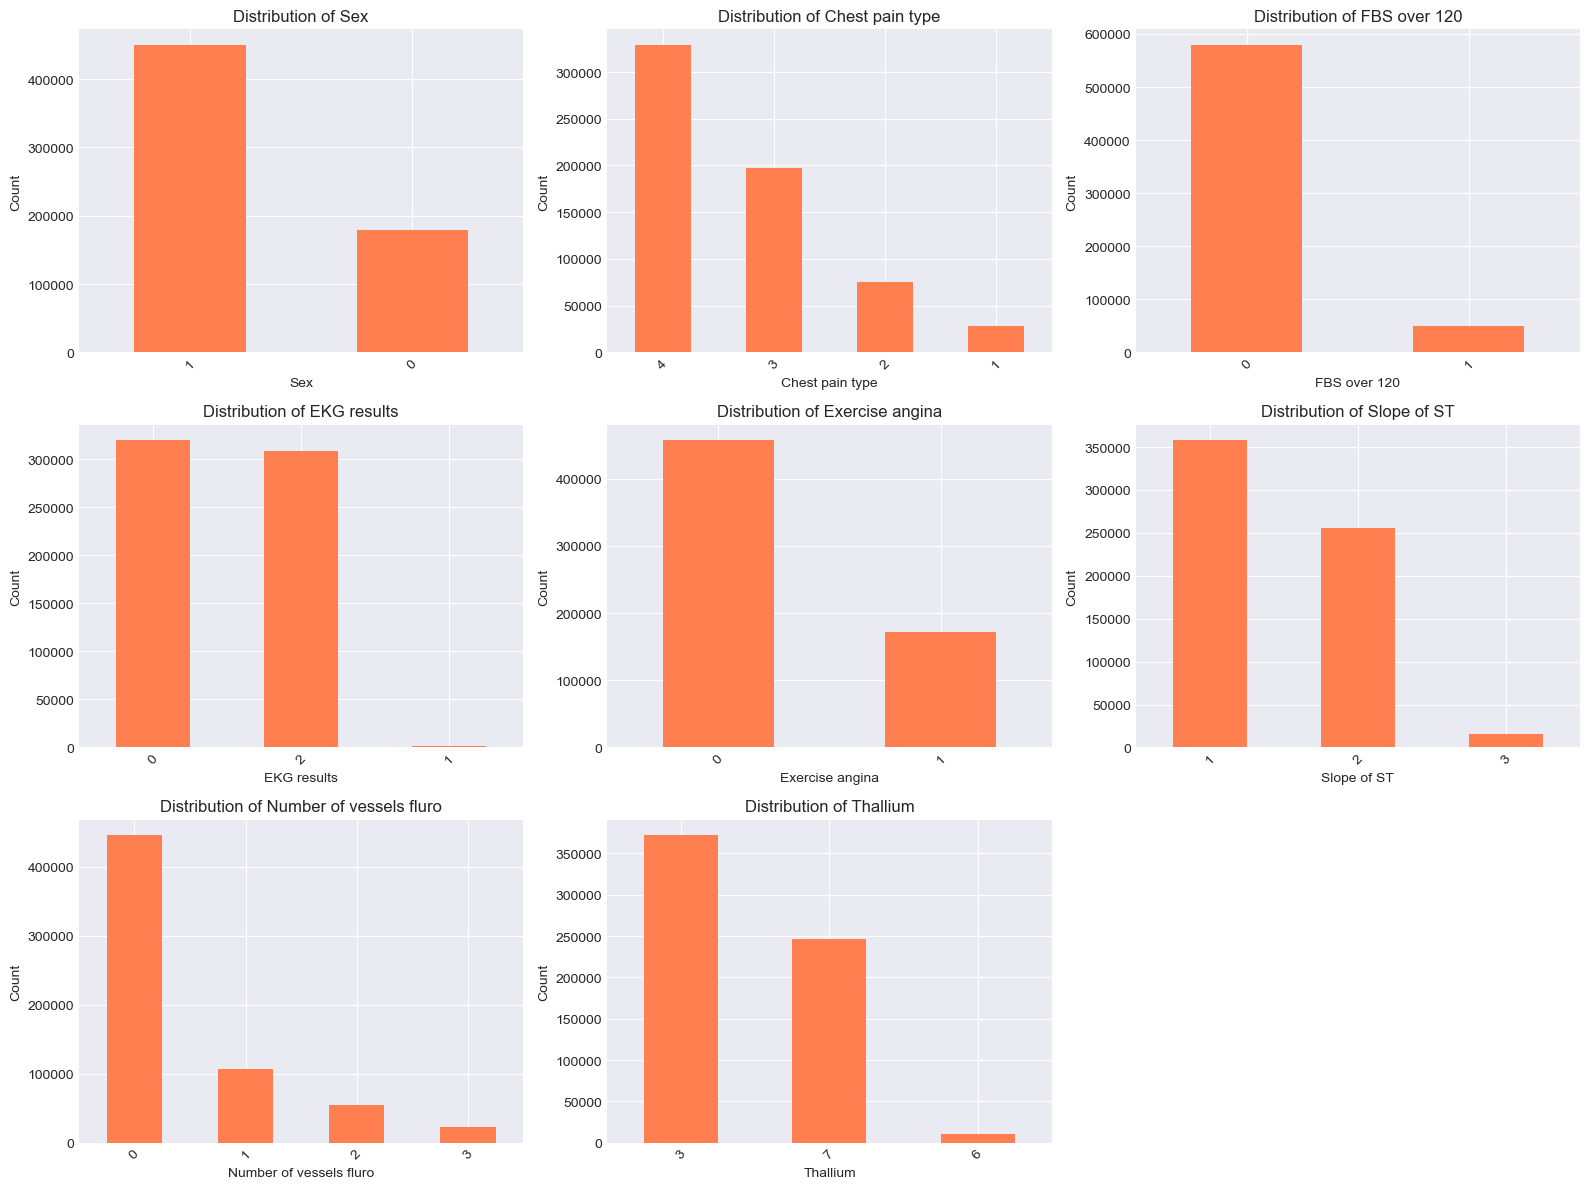

In [20]:
# Visualize categorical features
if len(categorical_cols) > 0:
    n_cols = min(3, len(categorical_cols))
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        train_df[col].value_counts().plot(kind='bar', ax=axes[idx], color='coral')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Hide extra subplots
    for idx in range(len(categorical_cols), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

### 3.8 Correlation Analysis

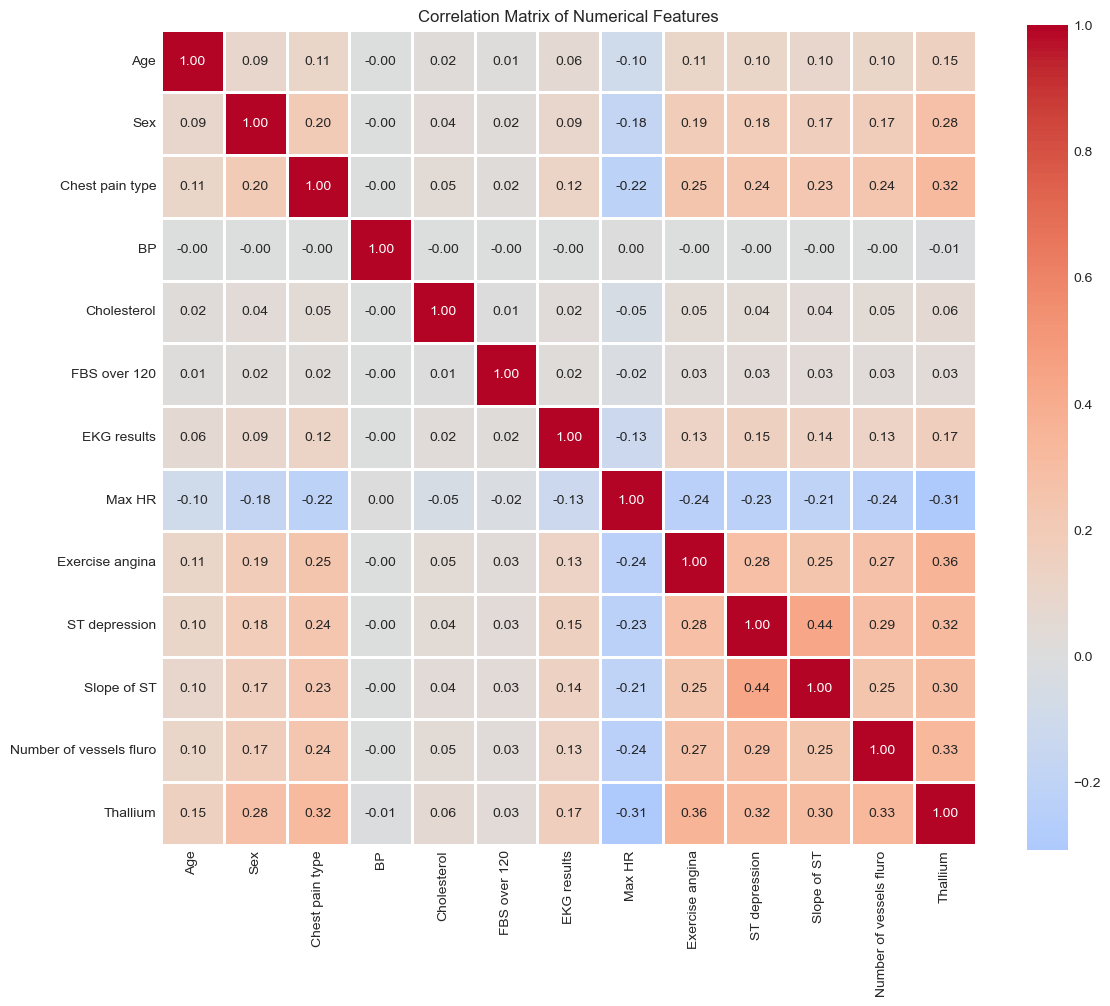

In [21]:
# Correlation matrix for numerical features
correlation_matrix = train_df.drop('Heart Disease', axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

No multicollinearity detected.

### 3.9 Outlier Detection

In [22]:
# Detect outliers using IQR method
if len(numerical_cols) > 0:
    outlier_summary = []
    
    for col in numerical_cols:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = train_df[(train_df[col] < lower_bound) | (train_df[col] > upper_bound)]
        outlier_summary.append({
            'Column': col,
            'Outlier_Count': len(outliers),
            'Outlier_Percent': (len(outliers) / len(train_df)) * 100,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound
        })
    
    outlier_df = pd.DataFrame(outlier_summary)
    display(outlier_df)

,Column,Outlier_Count,Outlier_Percent,Lower_Bound,Upper_Bound
0,Age,1048,0.17,30.00,78.00
1,BP,9011,1.43,90.00,170.00
2,Cholesterol,2194,0.35,154.00,338.00
3,Max HR,14246,2.26,106.00,202.00
4,ST depression,9971,1.58,-2.10,3.50


### 3.10 Feature Relationships with Target

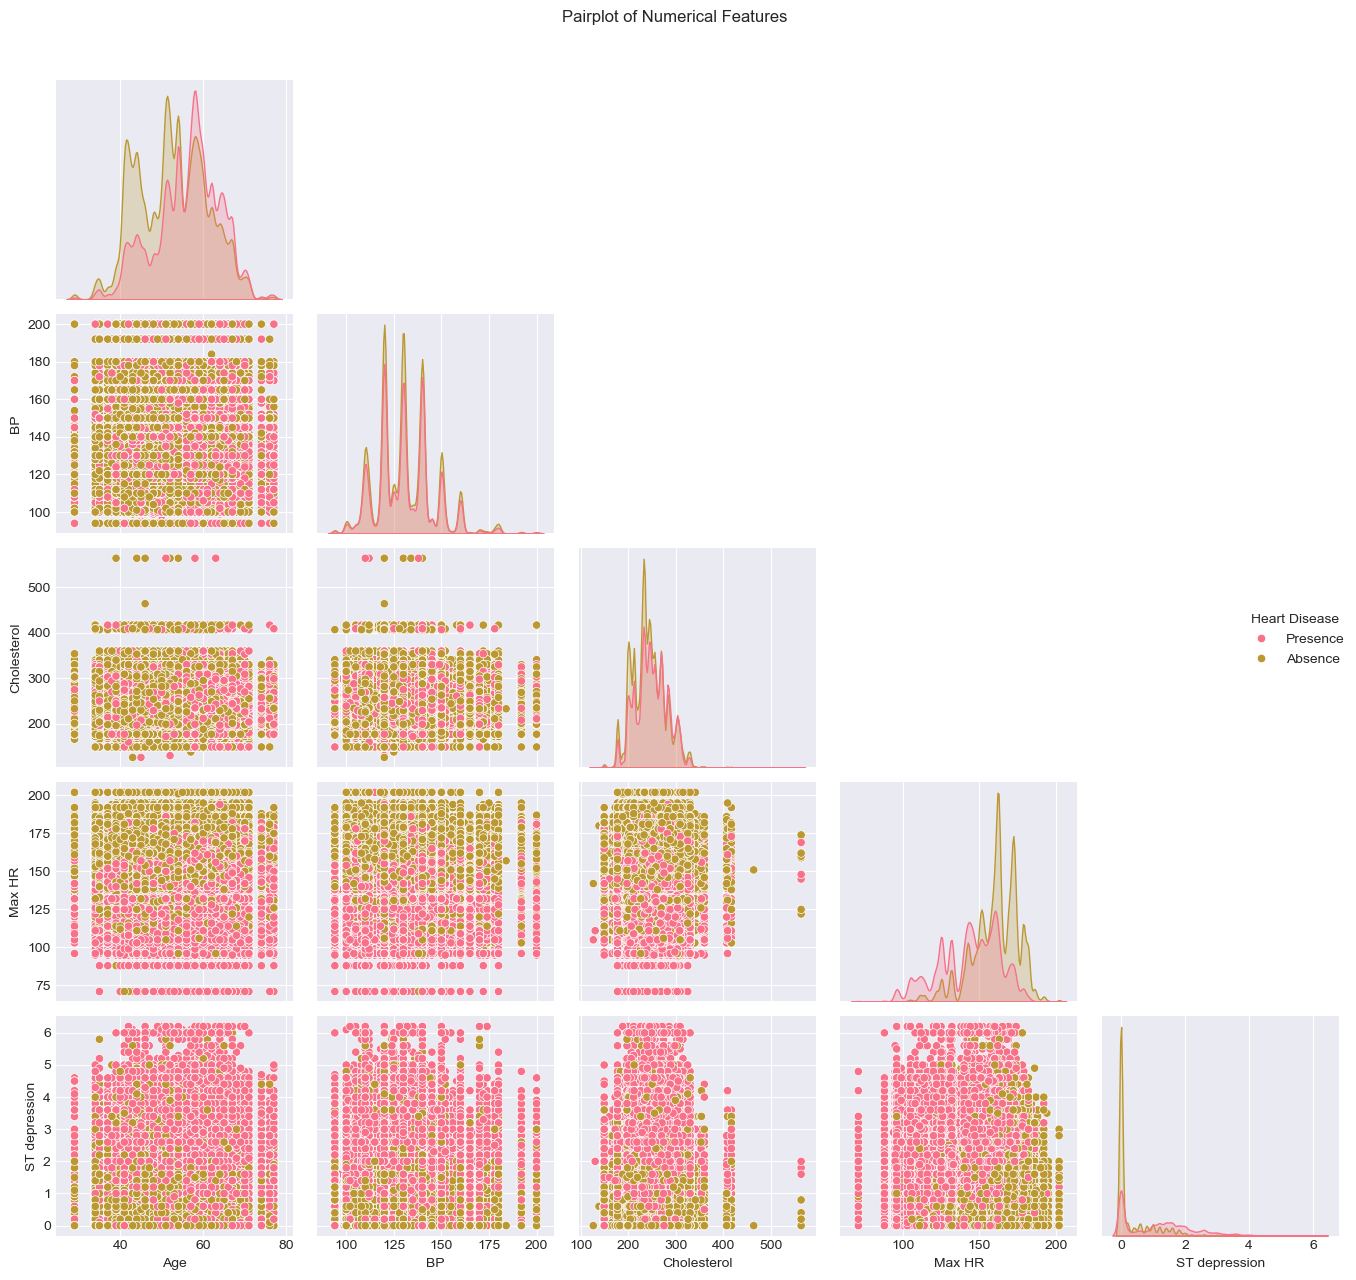

In [23]:
# Pairplot for key numerical features with label `Heart Disease`
sns.pairplot(train_df[numerical_cols + ['Heart Disease']], diag_kind='kde', corner=True, hue='Heart Disease')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()


## 4. Modelling

In [ ]:
# Separate features and target variable
X_train = train_df.drop('Heart Disease', axis=1)
y_train = train_df['Heart Disease']
X_test = test_df.copy()

In [41]:
# Use label encoder for the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded as: {np.unique(y_train_encoded)}")

Original classes: ['Absence' 'Presence']
Encoded as: [0 1]


### 4.1 Baseline

In [25]:
# Initialize and fit a baseline model (Logistic Regression)
baseline = LogisticRegression(random_state=25)
baseline.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,25
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
# Set up a cross validation scheme and evaluate the baseline model (optional, can be added later)
cv_scores = cross_val_score(baseline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")

Cross-validation scores: [0.9481033  0.94837959 0.94938256 0.947936   0.94823319]
Average CV score: 0.9484069298125244


### 4.2 With Preprocessing Pipeline

In [31]:
# Pipeline setup
lr_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=25))
])

In [33]:
# Set up a cross validation scheme and evaluate
cv_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")

Cross-validation scores: [0.95135545 0.94997489 0.95117909 0.94984425 0.95011322]
Average CV score: 0.9504933794665218


### 4.3 Model Selection

In [ ]:
# Basic setup of models 
models = {
    'Logistic Regression': LogisticRegression(random_state=25),
    'Decision Tree': DecisionTreeClassifier(random_state=25),
    'Random Forest': RandomForestClassifier(random_state=25),
    'XGBoost': XGBClassifier(use_label_encoder=True, eval_metric='logloss', random_state=25),
    'LightGBM': LGBMClassifier(random_state=25)
}

In [42]:
# For all models, perform cross-validation and print results
results = {}
for model_name, model in models.items():
    # Setup pipeline
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])

    # Evaluate with cross-validation
    y_train_to_use = y_train_encoded if model_name in ['XGBoost', 'LightGBM'] else y_train
    cv_scores = cross_val_score(pipeline, X_train, y_train_to_use, cv=5, scoring='roc_auc')
    print(f"{model_name} - Cross-validation scores: {cv_scores}")
    print(f"{model_name} - Average CV score: {cv_scores.mean()}\n")

    # Store results
    results[model_name] = cv_scores.mean()

Logistic Regression - Cross-validation scores: [0.95135545 0.94997489 0.95117909 0.94984425 0.95011322]
Logistic Regression - Average CV score: 0.9504933794665218

Decision Tree - Cross-validation scores: [0.82394734 0.82439392 0.82525353 0.82228555 0.82277052]
Decision Tree - Average CV score: 0.823730171867863

Random Forest - Cross-validation scores: [0.94795792 0.94684499 0.94787867 0.94638246 0.94643152]
Random Forest - Average CV score: 0.9470991102895084

XGBoost - Cross-validation scores: [0.95511916 0.95433425 0.95542049 0.95423756 0.95476734]
XGBoost - Average CV score: 0.9547757590943758

[LightGBM] [Info] Number of positive: 225963, number of negative: 278037
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 426
[LightGBM] [Info] Number of data points in the train set: 504

In [51]:
# Display results summary
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'ROC-AUC Score'])
results_df = results_df.sort_values('ROC-AUC Score', ascending=False).style.format('{:.6}', subset=['ROC-AUC Score'])
display(results_df)

,Model,ROC-AUC Score
4,LightGBM,0.954792
3,XGBoost,0.954776
0,Logistic Regression,0.950493
2,Random Forest,0.947099
1,Decision Tree,0.82373


### 4.4 Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
# Define parameter distributions for each model
param_distributions = {
    'Logistic Regression': {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2', 'elasticnet'],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'classifier__max_depth': [3, 5, 7, 10, 15, 20, None],
        'classifier__min_samples_split': [2, 5, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 4, 8],
        'classifier__criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'classifier__n_estimators': [10, 50, 100, 150],
        'classifier__max_depth': [5, 10, 15, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2', None]
    },
    'XGBoost': {
        'classifier__n_estimators': [10, 50, 100, 150],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'classifier__subsample': [0.6, 0.8, 1.0],
        'classifier__colsample_bytree': [0.6, 0.8, 1.0]
    },
    'LightGBM': {
        'classifier__n_estimators': [10, 50, 100, 150],
        'classifier__max_depth': [3, 5, 7, -1],
        'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
        'classifier__num_leaves': [15, 31, 63],
        'classifier__subsample': [0.6, 0.8, 1.0]
    }
}

In [ ]:
# Perform RandomizedSearchCV for each model
best_models = {}
best_params = {}
best_scores = {}

for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Tuning {model_name}...")
    print(f"{'='*60}")
    
    # Setup pipeline
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Determine which target to use
    y_train_to_use = y_train_encoded if model_name in ['XGBoost', 'LightGBM'] else y_train
    
    # Setup RandomizedSearchCV
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_distributions[model_name],
        n_iter=10,
        cv=5,
        scoring='roc_auc',
        random_state=25,
        n_jobs=1,
        verbose=1
    )
    
    # Fit the model
    random_search.fit(X_train, y_train_to_use)
    
    # Store results
    best_models[model_name] = random_search.best_estimator_
    best_params[model_name] = random_search.best_params_
    best_scores[model_name] = random_search.best_score_
    
    print(f"\nBest parameters: {random_search.best_params_}")
    print(f"Best ROC-AUC score: {random_search.best_score_:.4f}")


Tuning Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best parameters: {'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__C': 0.01}
Best ROC-AUC score: 0.9505

Tuning Decision Tree...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best parameters: {'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 8, 'classifier__max_depth': 15, 'classifier__criterion': 'gini'}
Best ROC-AUC score: 0.9361

Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
# Display best parameters and scores
print("\n" + "="*80)
print("HYPERPARAMETER TUNING RESULTS")
print("="*80)

for model_name in models.keys():
    print(f"\n{model_name}:")
    print(f"  Best Score: {best_scores[model_name]:.4f}")
    print(f"  Best Parameters: {best_params[model_name]}")

In [ ]:
# Compare baseline vs tuned models
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Baseline Score': list(results.values()),
    'Tuned Score': [best_scores[model] for model in results.keys()],
    'Improvement': [best_scores[model] - results[model] for model in results.keys()]
})
comparison_df = comparison_df.sort_values('Tuned Score', ascending=False)
display(comparison_df.style.format('{:.6}', subset=['Baseline Score', 'Tuned Score', 'Improvement']))